# Generate violinPLot for classifier data (train imagination - test chosen)

## Using choice onset (moment circles appear on screen)

subs : 3     4     6     7     9    10    11    12    13    14    15    17    18

wfu_hippo_LR

In [5]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


In [19]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
       # face.set_hatch('//')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(0.3)
  #  parts2 = plt.violinplot( all_arr
   #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) \
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)

In [21]:
 accuracy_imag_cho_LRHipp   =  [0.2671 ,   0.2671 ,   0.2614  ,  0.2407   , 0.2764  ,  0.2807    ,0.2557 ,   0.2464  ,  0.2414,    0.2486  ,  0.3107  ,  0.2564   , 0.2164]

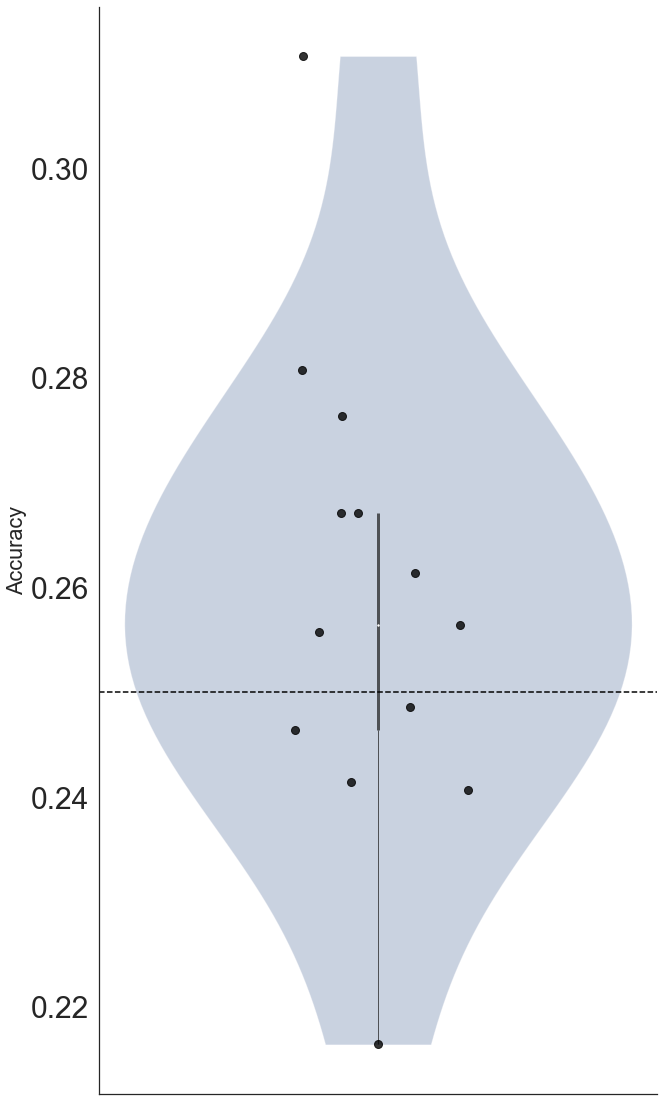

In [36]:
f = plt.figure(figsize=(10,20))
sns.set(style='white', font_scale=1.8)

colr_dict = { 0:'#4F6A9A', 1:'#AC5255' }
all_arr1 = [accuracy_imag_cho_LRHipp]
add_violin( all_arr1)
plt.xticks([], [])
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False, labelsize=30) 
plt.tick_params( axis='y', labelsize=30) 

plt.ylabel('Accuracy')
plt.axhline(0.25, color='black', linestyle = '--')
sns.despine()

position_parts= np.full(len(accuracy_imag_cho_LRHipp), 1, dtype=int)
jittr = np.random.uniform(low=-0.2,high=0.2,size=len(accuracy_imag_cho_LRHipp))/2
plt.plot(position_parts+jittr, accuracy_imag_cho_LRHipp, marker='o', ms=8, color='#000000',alpha=0.8,linestyle="None")

In [26]:
stats.ttest_1samp(accuracy_imag_cho_LRHipp, 0.25)

Ttest_1sampResult(statistic=1.4373429097567803, pvalue=0.17618082813979835)



# using 20 participants

In [39]:
accuracy_imag_cho_LRHipp   =  [0.251428571428571,
0.260714285714286,
0.232142857142857,
0.259285714285714,
0.258571428571429,
0.267857142857143,
0.258571428571429,
0.238571428571429,
0.236428571428571,
0.251428571428571,
0.290000000000000,
0.265000000000000,
0.230714285714286,
0.270769230769231,
0.212857142857143,
0.254285714285714,
0.232142857142857,
0.255714285714286,
0.280714285714286,
0.214285714285714]


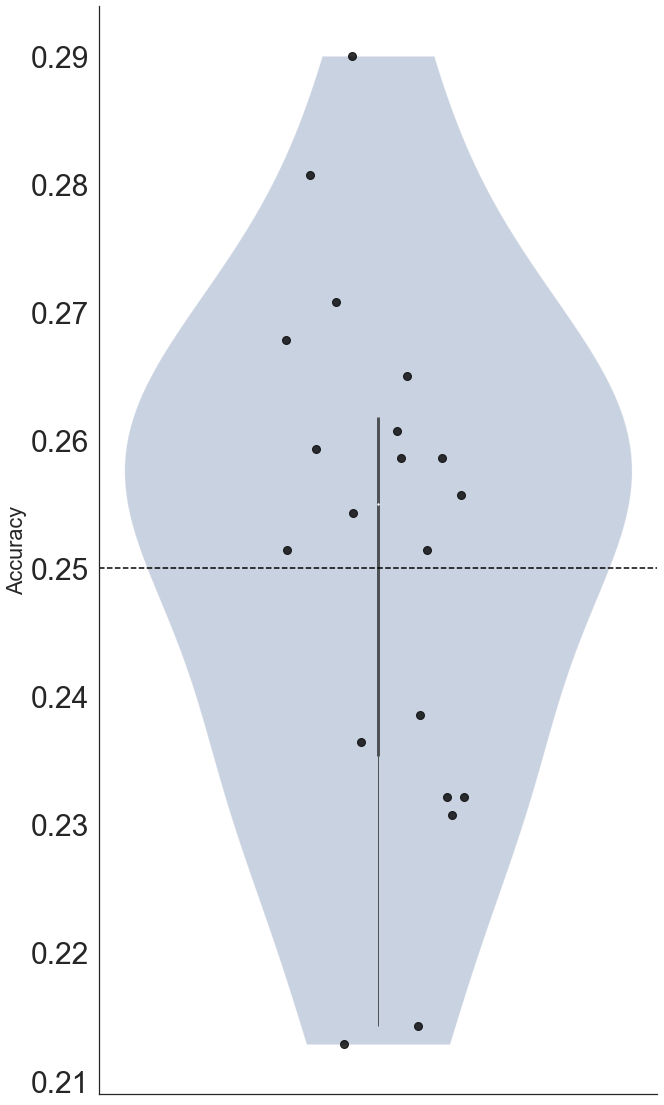

In [40]:
f = plt.figure(figsize=(10,20))
sns.set(style='white', font_scale=1.8)

colr_dict = { 0:'#4F6A9A', 1:'#AC5255' }
all_arr1 = [accuracy_imag_cho_LRHipp]
add_violin( all_arr1)
plt.xticks([], [])
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False, labelsize=30) 
plt.tick_params( axis='y', labelsize=30) 

plt.ylabel('Accuracy')
plt.axhline(0.25, color='black', linestyle = '--')
sns.despine()

position_parts= np.full(len(accuracy_imag_cho_LRHipp), 1, dtype=int)
jittr = np.random.uniform(low=-0.2,high=0.2,size=len(accuracy_imag_cho_LRHipp))/2
plt.plot(position_parts+jittr, accuracy_imag_cho_LRHipp, marker='o', ms=8, color='#000000',alpha=0.8,linestyle="None")

In [41]:
stats.ttest_1samp(accuracy_imag_cho_LRHipp, 0.25)

Ttest_1sampResult(statistic=0.23591424859181825, pvalue=0.8160235791482209)